In [1]:
import numpy as np
import pandas as pd
df_sample=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

In [2]:
df_sample = df_sample.reset_index(drop=True)

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['type'])
label
df_sample.drop("type", axis=1, inplace=True)
df_sample["type"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameDest'])
label
df_sample.drop("nameDest", axis=1, inplace=True)
df_sample["nameDest"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameOrig'])
label
df_sample.drop("nameOrig", axis=1, inplace=True)
df_sample["nameOrig"] = label

In [4]:
from sklearn.model_selection import train_test_split

X = df_sample.drop('isFraud', axis=1)
# Separate the target variable
y = df_sample['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64


In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Upsampling via SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=0)

#Downsample via RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.4, random_state=0)

#Application of the resampling methods
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [6]:
from imblearn.under_sampling import TomekLinks

#Resample using TomekLinks first
tomek_links = TomekLinks(sampling_strategy='majority')
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_resampled, y_resampled)

In [7]:
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours,OneSidedSelection
# resample the output of TomekLinks using EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_resampled_new, y_train_resampled_new = enn.fit_resample(X_train_resampled, y_train_resampled)

In [8]:
from imblearn.under_sampling import OneSidedSelection
# resample the output of EditedNearestNeighbours using One-Sided Selection
oss = OneSidedSelection(sampling_strategy='majority')
X_train_resampled_final, y_train_resampled_final = oss.fit_resample(X_train_resampled_new, y_train_resampled_new)

In [9]:
# import the necessary libraries
import pandas as pd
import numpy as np
# convert X_test to a pandas dataframe
X_test = pd.DataFrame(X_test, columns=X_train.columns)
# define a function to replace outliers with MAD for a single column
def replace_outliers_with_mad(column):
    median = np.median(column)
    mad = np.median(np.abs(column - median))
    threshold = 2.5 * mad
    column[np.abs(column - median) > threshold] = median
    return column

# apply the function to all columns of X_train_resampled_final
for i in range(X_train_resampled_final.shape[1]):
    X_train_resampled_final.iloc[:, i] = replace_outliers_with_mad(X_train_resampled_final.iloc[:, i])

# apply the function to all columns of X_test
for i in range(X_test.shape[1]):
    X_test.iloc[:, i] = replace_outliers_with_mad(X_test.iloc[:, i])

# convert the numpy arrays back to pandas dataframes
X_train_resampled_final = pd.DataFrame(X_train_resampled_final, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

# print the modified dataframes
print(X_train_resampled_final)
print(X_test)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


        step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        514    7794.780000   42004.670000             0.0         11038.0   
1        138   44423.330000   42004.670000             0.0         11038.0   
2        325  122118.731429    4564.000000             0.0         11038.0   
3        308  300712.340000   51474.000000             0.0         11038.0   
4        349   47243.760000   11262.000000             0.0             0.0   
...      ...            ...            ...             ...             ...   
425936   276  111168.880136  111168.880136             0.0         11038.0   
425937   274  122118.731429   42004.670000             0.0         11038.0   
425938    60  122118.731429   42004.670000             0.0             0.0   
425939   449   44882.356239   44882.356239             0.0             0.0   
425940   220   39953.091459   29059.334627             0.0         11038.0   

        newbalanceDest  isFlaggedFraud  type  nameDest  nameOri

In [10]:
# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler = StandardScaler()
model = scaler.fit(X_train_resampled_final)
X_train_resampled_final = model.transform(X_train_resampled_final)

In [11]:
# compute required values
scaler = StandardScaler()
model = scaler.fit(X_test)
X_test = model.transform(X_test)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6622/6656 [============================>.] - ETA: 0s - loss: 0.5497WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000263810BB708> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the f

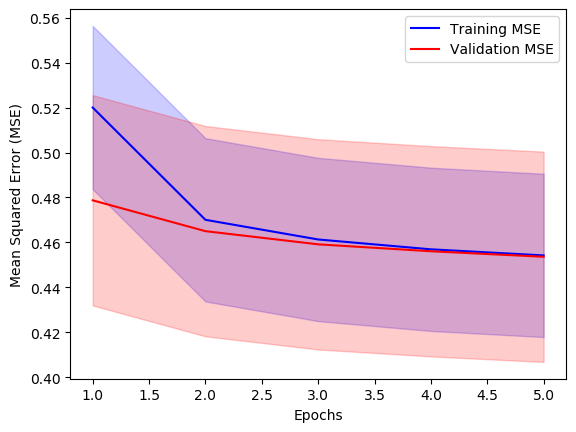

In [59]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
from keras import regularizers
from keras.callbacks import EarlyStopping
# Set random seed for reproducibility
np.random.seed(42)

# Define the autoencoder architecture
input_dim = X_train_resampled_final.shape[1]
encoding_dim = 32
decoding_dim = 10

input_layer = Input(shape=(input_dim,))
#hidden_layer = Dense(encoding_dim, activation='relu')(input_layer)

# Add L1 regularization to the hidden layer
hidden_layer = Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l1(0.00991))(input_layer)

output_layer = Dense(decoding_dim, activation='sigmoid')(hidden_layer)

# Define the optimizer with the desired learning rate

opt = Adam(lr= 0.00087)
# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
#autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.compile(optimizer=opt, loss='mse')

# Define the number of folds for cross-validation
n_splits = 2
kf = KFold(n_splits=n_splits)

# Define lists to store the MSE of training and validation sets for each fold
train_mse = []
val_mse = []
test_mse = []
recon_errors = []


# Loop over each fold
for train_index, val_index in kf.split(X_train_resampled_final):
    
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train_resampled_final[train_index], X_train_resampled_final[val_index]
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    # Fit the autoencoder on the training set for the current fold
    history = autoencoder.fit(X_train_fold, X_train_fold, epochs=5, batch_size=32, verbose=1, validation_data=(X_val_fold, X_val_fold),callbacks=[early_stopping])
    
    # Append the MSE of training and validation sets for the current fold to the lists
    train_mse.append(history.history['loss'])
    val_mse.append(history.history['val_loss'])
    
    # compute the reconstruction error for the test data
    recon_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    recon_errors.append(recon_error)
    
    # Calculate the MSE for the test set
    test_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    test_mse.append(test_error)
    print(f"Test MSE: {test_error:.5f}")

# Calculate the mean and standard deviation of MSE for training and validation sets across all folds
mean_train_mse = np.mean(train_mse, axis=0)
#std_train_mse = np.std(np.array(train_mse), axis=0)
std_train_mse = np.std(np.concatenate(train_mse), axis=0)

mean_val_mse = np.mean(val_mse, axis=0)
#std_val_mse = np.std(np.array(val_mse), axis=0)
std_val_mse = np.std(np.concatenate(val_mse), axis=0)


# Plot the MSE of training and validation sets against the number of epochs
epochs = range(1, len(mean_train_mse)+1)
plt.plot(epochs, mean_train_mse, 'b', label='Training MSE')
plt.fill_between(epochs, mean_train_mse - std_train_mse, mean_train_mse + std_train_mse, alpha=0.2, color='b')
plt.plot(epochs, mean_val_mse, 'r', label='Validation MSE')
plt.fill_between(epochs, mean_val_mse - std_val_mse, mean_val_mse + std_val_mse, alpha=0.2, color='r')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [60]:
# Generate reconstructed outputs for the test set
reconstructed = autoencoder.predict(X_test)

# Calculate the MSE between the input and the reconstructed output for each data point
recon_errors = np.mean(np.power(X_test - reconstructed, 2), axis=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2188/2188 [==============================] - 2s 1ms/step


In [61]:
test_mse_fold = np.mean(recon_errors)
test_mse.append(test_mse_fold)

In [62]:
# Print the final mean and standard deviation of reconstruction error across all folds
print(f"Mean Reconstruction Error: {np.mean(test_mse):.5f}")

Mean Reconstruction Error: 0.44229


In [63]:
mse = autoencoder.evaluate(X_test, X_test)
print('Mean squared error on test data:', mse)

2188/2188 [==============================] - 3s 1ms/step - loss: 0.4435
Mean squared error on test data: 0.44346120953559875


In [64]:
mean_train_mse_avg = np.mean(mean_train_mse)
print("Mean Train MSE (Average):", mean_train_mse_avg)

Mean Train MSE (Average): 0.47250578105449675


In [65]:
autoencoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 10)]              0         
                                                                 
 dense_22 (Dense)            (None, 32)                352       
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 682
Trainable params: 682
Non-trainable params: 0
_________________________________________________________________


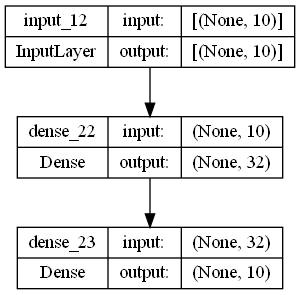

In [66]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='autoencoder_last.png', show_shapes=True)

## Extract hidden layer from autoencder

In [67]:
# create a new model that outputs the hidden layer
hidden_layer_output = autoencoder.layers[1].output
hidden_layer_model = Model(inputs=autoencoder.input, outputs=hidden_layer_output)

# get the hidden layer output for a sample
sample_hidden_output = hidden_layer_model.predict(X_train_resampled_final[0].reshape(1, -1))
print(sample_hidden_output)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 40ms/step
[[1.5460943  0.85886407 1.4560658  0.39715248 0.8010591  1.6935573
  0.         0.16950393 0.28945416 0.61553407 0.46002254 0.5013484
  1.2306528  0.6502655  1.9755261  1.4184802  0.2285017  0.7721917
  0.         1.4768996  1.5383255  1.458306   0.35582003 0.7151213
  0.         0.         1.6455908  0.4884674  1.7311789  0

In [68]:
# create the mediator network with the hidden layer output as input
mediator_input_layer = Input(shape=hidden_layer_output.shape[1:])
mediator_hidden_layer = Dense(11, activation='relu')(mediator_input_layer)
mediator_output_layer = Dense(2, activation='sigmoid')(mediator_hidden_layer)

mediator_network = Model(inputs=mediator_input_layer, outputs=mediator_output_layer)
mediator_network.compile(optimizer='adam', loss='mse')
mediator_network.fit(hidden_layer_model.predict(X_train_resampled_final), y_train_resampled_final, epochs=1, batch_size=32)

13311/13311 [==============================] - 15s 1ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13311/13311 [==============================] - 19s 1ms/step - loss: 0.1740


In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# create a dictionary with the hyperparameters to be optimized
param_grid = {
    'hidden_layer_sizes': [(i,) for i in range(1, 21)], # test 1 to 20 neurons in the hidden layer
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam']
}

# create the MLPClassifier model
mlp = MLPClassifier(max_iter=10)

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train_resampled_final, y_train_resampled_final)

# print the best hyperparameters and corresponding accuracy score
print("Best parameters: ", grid_search.best_params_)
print("Accuracy score: ", grid_search.best_score_)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\230

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\230

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\230

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\230

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\230

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\230

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\230

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Best parameters:  {'activation': 'relu', 'hidden_layer_sizes': (17,), 'solver': 'adam'}
Accuracy score:  0.9479857506927936


C:\Users\23059\anaconda3\envs\test2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Best number of neurons: mediator network

In [71]:
# create the mediator network with the hidden layer output as input
mediator_input_layer = Input(shape=hidden_layer_output.shape[1:])
mediator_hidden_layer = Dense(17, activation='relu')(mediator_input_layer)
mediator_output_layer = Dense(2, activation='sigmoid')(mediator_hidden_layer)

mediator_network = Model(inputs=mediator_input_layer, outputs=mediator_output_layer)
mediator_network.compile(optimizer='adam', loss='mse')
mediator_network.fit(hidden_layer_model.predict(X_train_resampled_final), y_train_resampled_final, epochs=1, batch_size=32)

13311/13311 [==============================] - 14s 1ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13311/13311 [==============================] - 18s 1ms/step - loss: 0.1562


In [72]:
mediator_network.fit(hidden_layer_model.predict(X_train_resampled_final), y_train_resampled_final, epochs=10, batch_size=32, validation_data=(hidden_layer_model.predict(X_test), y_test))

2188/2188 [==============================] - 2s 1ms/step
Epoch 1/10
13292/13311 [============================>.] - ETA: 0s - loss: 0.1248WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000026382094168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13311/13311 [==============================] - 21s 2ms/step - loss: 0.1248 - val_loss: 0

In [73]:
from keras.callbacks import LambdaCallback

# define a function to print the loss after each epoch
def print_loss(epoch, logs):
    print('Epoch {}: loss = {}'.format(epoch+1, logs['loss']))

# create the callback
print_callback = LambdaCallback(on_epoch_end=print_loss)

# fit the model with the callback
mediator_network.fit(hidden_layer_model.predict(X_train_resampled_final), y_train_resampled_final,
                     epochs=10, batch_size=32, callbacks=[print_callback])


13311/13311 [==============================] - 14s 1ms/step
Epoch 1/10
13311/13311 [==============================] - 18s 1ms/step - loss: 0.0546
Epoch 2/10
13311/13311 [==============================] - 18s 1ms/step - loss: 0.0529
Epoch 3/10
13311/13311 [==============================] - 18s 1ms/step - loss: 0.0516
Epoch 4/10
13311/13311 [==============================] - 18s 1ms/step - loss: 0.0510
Epoch 5/10
13311/13311 [==============================] - 18s 1ms/step - loss: 0.0506
Epoch 6/10
13311/13311 [==============================] - 18s 1ms/step - loss: 0.0500
Epoch 7/10
13311/13311 [==============================] - 18s 1ms/step - loss: 0.0496
Epoch 8/10
13311/13311 [==============================] - 18s 1ms/step - loss: 0.0492
Epoch 9/10
13311/13311 [==============================] - 18s 1ms/step - loss: 0.0489
Epoch 10/10
13311/13311 [==============================] - 18s 1ms/step - loss: 0.0488


2188/2188 [==============================] - 3s 1ms/step
Epoch 1/7
13311/13311 [==============================] - 23s 2ms/step - loss: 0.0485 - val_loss: 0.0700
Epoch 2/7
13311/13311 [==============================] - 24s 2ms/step - loss: 0.0484 - val_loss: 0.0851
Epoch 3/7
13311/13311 [==============================] - 22s 2ms/step - loss: 0.0483 - val_loss: 0.0685
Epoch 4/7
13311/13311 [==============================] - 23s 2ms/step - loss: 0.0481 - val_loss: 0.0447
Epoch 5/7
13311/13311 [==============================] - 24s 2ms/step - loss: 0.0482 - val_loss: 0.0754
Epoch 6/7
13311/13311 [==============================] - 23s 2ms/step - loss: 0.0482 - val_loss: 0.0904
Epoch 7/7
13311/13311 [==============================] - 23s 2ms/step - loss: 0.0479 - val_loss: 0.0491


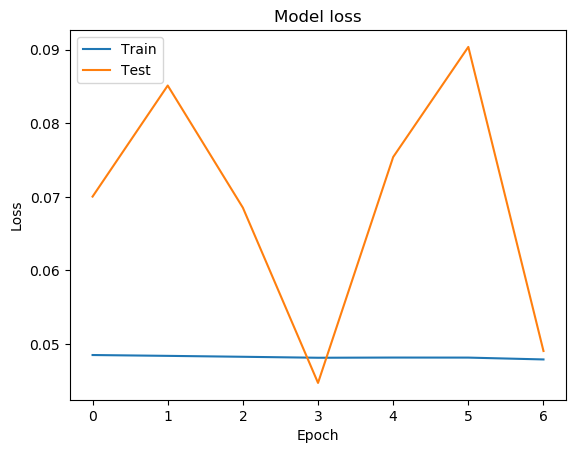

In [76]:
history = mediator_network.fit(hidden_layer_model.predict(X_train_resampled_final), y_train_resampled_final, epochs=7, batch_size=32, validation_data=(hidden_layer_model.predict(X_test), y_test))

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [78]:
from sklearn.model_selection import KFold

# Define the number of folds
n_splits = 2

# Initialize a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store the validation losses
val_losses = []

# Loop over the folds
for train_idx, val_idx in kf.split(X_train_resampled_final):
    # Get the training and validation data for this fold
    X_train_fold = hidden_layer_model.predict(X_train_resampled_final[train_idx])
    y_train_fold = y_train_resampled_final[train_idx]
    X_val_fold = hidden_layer_model.predict(X_train_resampled_final[val_idx])
    y_val_fold = y_train_resampled_final[val_idx]
    
    # Train the model on this fold
    history=mediator_network.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, verbose=1)
    
    # Evaluate the model on the validation data for this fold
    val_loss = mediator_network.evaluate(X_val_fold, y_val_fold)
    val_losses.append(val_loss)

# Calculate the mean and standard deviation of the validation losses
mean_val_loss = np.mean(val_losses)
std_val_loss = np.std(val_losses)

print("Mean validation loss:", mean_val_loss)
print("Standard deviation of validation loss:", std_val_loss)

6656/6656 [==============================] - 9s 1ms/step
Epoch 1/5
6656/6656 [==============================] - 10s 2ms/step - loss: 0.0472
Epoch 2/5
6656/6656 [==============================] - 10s 2ms/step - loss: 0.0473
Epoch 3/5
6656/6656 [==============================] - 10s 2ms/step - loss: 0.0471
Epoch 4/5
6656/6656 [==============================] - 10s 2ms/step - loss: 0.0472
Epoch 5/5
6656/6656 [==============================] - 9s 1ms/step
Epoch 1/5
6656/6656 [==============================] - 10s 1ms/step - loss: 0.0473
Epoch 2/5
6656/6656 [==============================] - 10s 1ms/step - loss: 0.0472
Epoch 3/5
6656/6656 [==============================] - 10s 1ms/step - loss: 0.0472
Epoch 4/5
6656/6656 [==============================] - 10s 1ms/step - loss: 0.0473
Epoch 5/5
6656/6656 [==============================] - 9s 1ms/step - loss: 0.0450
Mean validation loss: 0.04552677646279335
Standard deviation of validation loss: 0.0005190372467041016


2188/2188 [==============================] - 3s 1ms/step
Epoch 1/10
13311/13311 [==============================] - 23s 2ms/step - loss: 0.0471 - val_loss: 0.0565
Epoch 2/10
13311/13311 [==============================] - 25s 2ms/step - loss: 0.0471 - val_loss: 0.0883
Epoch 3/10
13311/13311 [==============================] - 22s 2ms/step - loss: 0.0470 - val_loss: 0.0527
Epoch 4/10
13311/13311 [==============================] - 25s 2ms/step - loss: 0.0472 - val_loss: 0.0626
Epoch 5/10
13311/13311 [==============================] - 23s 2ms/step - loss: 0.0471 - val_loss: 0.0617
Epoch 6/10
13311/13311 [==============================] - 22s 2ms/step - loss: 0.0471 - val_loss: 0.0645
Epoch 7/10
13311/13311 [==============================] - 25s 2ms/step - loss: 0.0468 - val_loss: 0.0866
Epoch 8/10
13311/13311 [==============================] - 25s 2ms/step - loss: 0.0470 - val_loss: 0.0787
Epoch 9/10
13311/13311 [==============================] - 58s 4ms/step - loss: 0.0469 - val_loss: 0.067

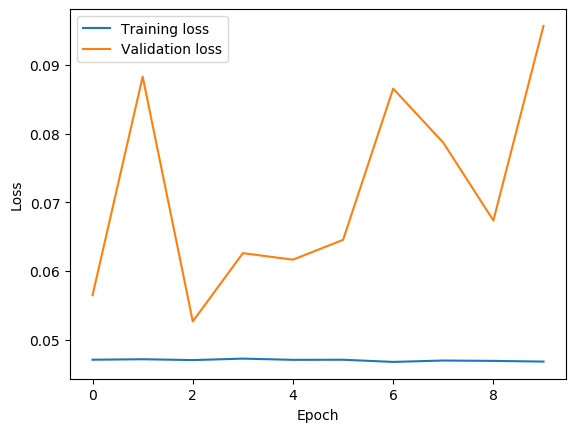

In [79]:
history = mediator_network.fit(hidden_layer_model.predict(X_train_resampled_final), y_train_resampled_final, epochs=7, batch_size=32, validation_data=(hidden_layer_model.predict(X_test), y_test))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

4375/4375 [==============================] - 16s 4ms/step


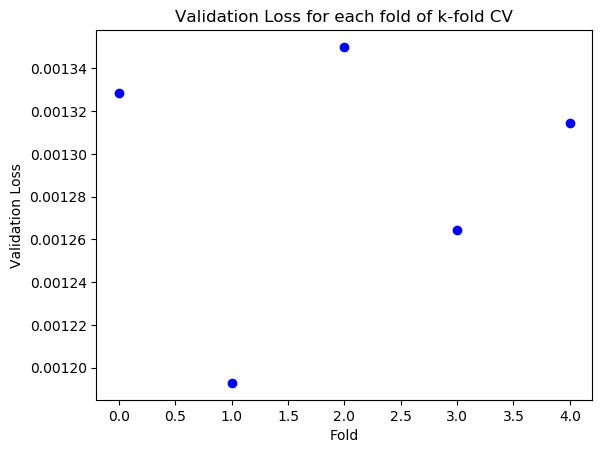

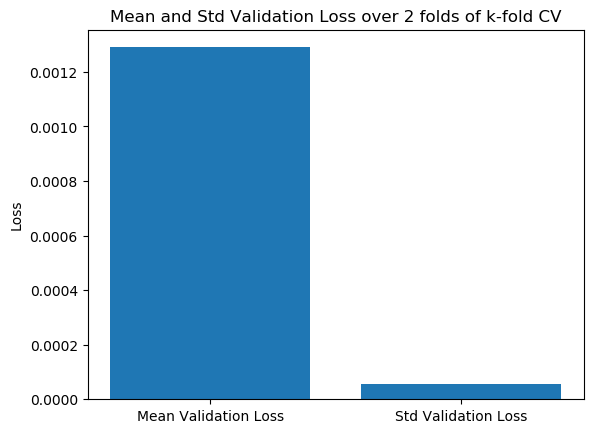

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
np.random.seed(42)
# Define the number of folds
k = 2

# Initialize lists to store the validation loss values for each fold
val_loss_all_folds = []


kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_indices, val_indices) in enumerate(kf.split(X)):
    # Get the training and validation data for this fold
    X_train, X_val = X.loc[train_indices], X.loc[val_indices]
    y_train, y_val = y.loc[train_indices], y.loc[val_indices]
    
    # Train the mediator network
    mediator_network.fit(hidden_layer_model.predict(X_train), y_train, epochs=2, batch_size=32, verbose=0)
    
    # Evaluate the mediator network on the validation set
    val_loss = mediator_network.evaluate(hidden_layer_model.predict(X_val), y_val, verbose=0)
    
    # Append the validation loss for this fold to the list
    val_loss_all_folds.append(val_loss)

# Calculate the mean and standard deviation of the validation loss over the folds
mean_val_loss = np.mean(val_loss_all_folds)
std_val_loss = np.std(val_loss_all_folds)

# Plot the validation loss for each fold
plt.plot(val_loss_all_folds, 'bo')
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for each fold of k-fold CV')
plt.show()

# Plot the mean and standard deviation of the validation loss over the folds
plt.bar(['Mean Validation Loss', 'Std Validation Loss'], [mean_val_loss, std_val_loss])
plt.ylabel('Loss')
plt.title('Mean and Std Validation Loss over {} folds of k-fold CV'.format(k))
plt.show()

In [47]:
from sklearn import metrics
print(sorted(metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


In [70]:
# import matplotlib.pyplot as plt
# from keras.layers import Input, Dense
# from keras.models import Model
# from keras.optimizers import Adam
# from sklearn.model_selection import KFold
# import numpy as np
# from keras import regularizers
# from keras.callbacks import EarlyStopping
# # Set random seed for reproducibility
# np.random.seed(42)

# # # Define the autoencoder architecture
# # #Input layer
# # input_dim = X_train_resampled_final.shape[1]
# # #Hidden layer
# # encoding_dim = 11
# # #Output layer
# # decoding_dim = 10

# mediator_input_layer = Input(shape=hidden_layer_output.shape[1:])
# mediator_hidden_layer = Dense(32, activation='relu')(mediator_input_layer)
# mediator_output_layer = Dense(2, activation='sigmoid')(mediator_hidden_layer)
# # input_layer = Input(shape=(input_dim,))
# # #hidden_layer = Dense(encoding_dim, activation='relu')(input_layer)

# # # Add L1 regularization to the hidden layer
# # hidden_layer = Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l1(0.00991))(mediator_input_layer)

# # output_layer = Dense(decoding_dim, activation='sigmoid')(hidden_layer)

# # Define the optimizer with the desired learning rate

# opt = Adam(lr= 0.00087)
# # # Define the autoencoder model
# # autoencoder = Model(inputs=input_layer, outputs=output_layer)
# # #autoencoder.compile(optimizer='adam', loss='mse')
# # autoencoder.compile(optimizer=opt, loss='mse')
# mediator_network = Model(inputs=mediator_input_layer, outputs=mediator_output_layer)
# mediator_network.compile(optimizer='adam', loss='mse')


# # Define the number of folds for cross-validation
# n_splits = 2
# kf = KFold(n_splits=n_splits)

# # Define lists to store the MSE of training and validation sets for each fold
# train_mse = []
# val_mse = []
# test_mse = []
# recon_errors = []


# # Loop over each fold
# for train_index, val_index in kf.split(X_train_resampled_final):
    
#     # Split the data into training and validation sets for the current fold
#     X_train_fold, X_val_fold = X_train_resampled_final[train_index], X_train_resampled_final[val_index]
    
#     early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#     # Fit the mediator ne on the training set for the current fold
#     history = mediator_network.fit(X_train_fold, X_train_fold, epochs=5, batch_size=32, verbose=1, validation_data=(X_val_fold, X_val_fold),callbacks=[early_stopping])
    
#     # Append the MSE of training and validation sets for the current fold to the lists
#     train_mse.append(history.history['loss'])
#     val_mse.append(history.history['val_loss'])
    
#     # compute the reconstruction error for the test data
#     recon_error = mediator_network.evaluate(X_test, X_test, verbose=0)
#     recon_errors.append(recon_error)
    
#     # Calculate the MSE for the test set
#     test_error = mediator_network.evaluate(X_test, X_test, verbose=0)
#     test_mse.append(test_error)
#     print(f"Test MSE: {test_error:.5f}")

# # Calculate the mean and standard deviation of MSE for training and validation sets across all folds
# mean_train_mse = np.mean(train_mse, axis=0)
# #std_train_mse = np.std(np.array(train_mse), axis=0)
# std_train_mse = np.std(np.concatenate(train_mse), axis=0)

# mean_val_mse = np.mean(val_mse, axis=0)
# #std_val_mse = np.std(np.array(val_mse), axis=0)
# std_val_mse = np.std(np.concatenate(val_mse), axis=0)


# # Plot the MSE of training and validation sets against the number of epochs
# epochs = range(1, len(mean_train_mse)+1)
# plt.plot(epochs, mean_train_mse, 'b', label='Training MSE')
# plt.fill_between(epochs, mean_train_mse - std_train_mse, mean_train_mse + std_train_mse, alpha=0.2, color='b')
# plt.plot(epochs, mean_val_mse, 'r', label='Validation MSE')
# plt.fill_between(epochs, mean_val_mse - std_val_mse, mean_val_mse + std_val_mse, alpha=0.2, color='r')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.legend()
# plt.show()